In [1]:
df = pd.read_parquet('walmart.parquet')
df.head(1)

,weekly_sales,sid,dept,store,type,size,temperature_stdev,fuel_price_avg,fuel_price_stdev,cpi_avg,cpi_stdev,unemployment_avg,unemployment_stdev,holidayfreq
0,6,253385,5,24,1,203819,34.785,9.963135,3.499,0.268701,134.613271,2.638256,8.3645,0.126572


In [5]:
from sklearn.model_selection import train_test_split

X = df[df.columns[df.columns != 'weekly_sales']]
y = df['weekly_sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

In [7]:
import lightgbm as lgb

clf = lgb.LGBMClassifier(num_leaves=6, min_data_in_leaf=4, max_depth=6)
clf.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=6,
               min_child_samples=20, min_child_weight=0.001, min_data_in_leaf=4,
               min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=6,
               objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [14]:
fts = zip(X_train.columns, clf.feature_importances_)
sorted(fts, key=lambda x:x[1], reverse=True)

[('dept', 2260),
 ('size', 516),
 ('store', 244),
 ('unemployment_stdev', 119),
 ('type', 81),
 ('unemployment_avg', 54),
 ('holidayfreq', 48),
 ('cpi_stdev', 46),
 ('cpi_avg', 41),
 ('temperature_stdev', 35),
 ('sid', 26),
 ('fuel_price_avg', 16),
 ('fuel_price_stdev', 14)]

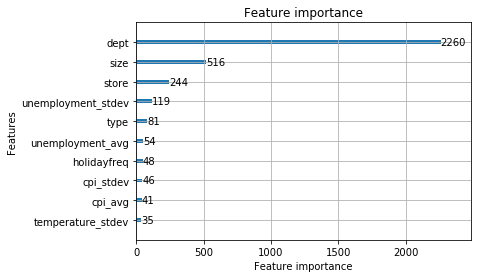

In [23]:
lgb.plot_importance(clf, max_num_features=10)

In [20]:
from sklearn.metrics import mean_squared_error  

pred = clf.predict(X_test)
print('RMSE: %f' % np.sqrt(mean_squared_error(y_test, pred)))

RMSE: 0.934733


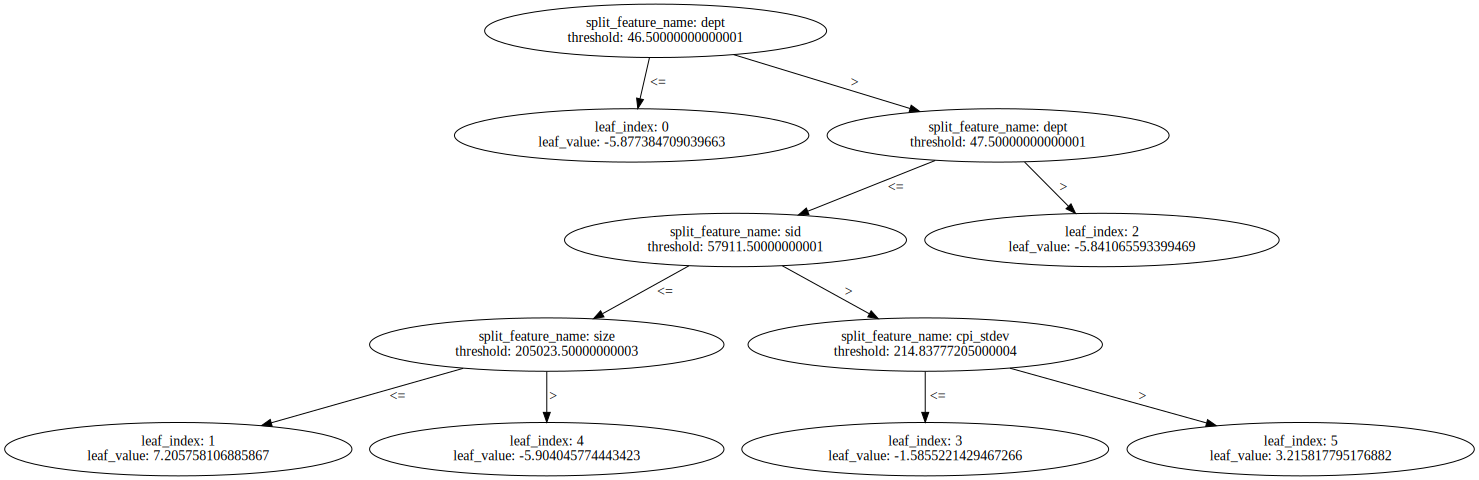

In [25]:
lgb.create_tree_digraph(clf)

In [21]:
from dtreeviz.trees import dtreeviz

viz = dtreeviz(
    clf,
    X_train,
    y_train,
    target_name='weekly_sales',
    feature_names=X.columns,
    class_names=['1', '2', '3', '4', '5', '6', '7'])
                                                                                                                                            
viz.view()

AttributeError: 'LGBMClassifier' object has no attribute 'tree_'